In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names=["T-shirts/top","trousers","Pullovers","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [6]:
# Data reshaping is to be done in CNN and was not done in ANN.
# In ANN , we had first 'flatten' our dataset but here we will convert our 2D dataset into 3D dataset by adding 'channnel' or 'feature map' as a dimension.

In [8]:
X_train_full=X_train_full.reshape((60000,28,28,1))  # 60000 images are in training dataset
X_test=X_test.reshape((10000,28,28,1))              # 10000 images are in testing dataset

In [9]:
# Data Normalization
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [13]:
#dividing data into train,test and validation
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [14]:
#creating Model architecture

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
# CNN uses ANN. ANN will be added after CNN layers.

In [20]:
# number of 'filters' is equal to number of 'feature maps' or 'channels' as each 'filter' gives rise to one feature map. This will give height to a convolutionary layer.

In [27]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
# filter means feature maps or channels. So, these filters give height to a 'convolutionary layer'.
# kernel_size means filter size.
# Activation function will always be 'Rectified Linear Unit(ReLU)' in CNN.
# In input_shape=(28,28,1) ; '1' is number of 'channel' / 'feature-map' / 'filter' .In a coloured picture, this number will be 3.
model.add(keras.layers.MaxPooling2D((2,2)))
# Pooling layer is used so, as to reduce time , number of computations ,load on system (pc, laptop etc) etc .Pooling layers do not overlap.
# So, receptive field is of 2 x 2. As pooling layer is a receptive field.

# ANN starts from here:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

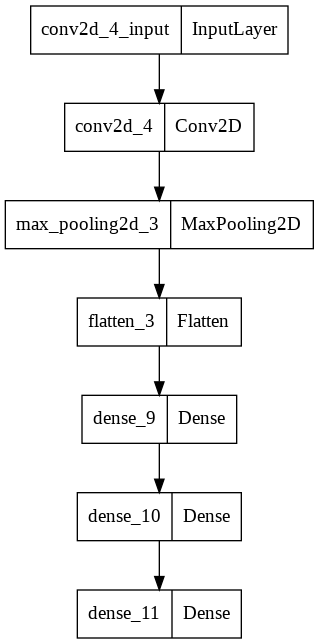

In [28]:
import pydot
keras.utils.plot_model(model)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 300)               1622700   
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                      

In [30]:
# from summary , due to use of maxpooling our parameters are lesser otherwise, due to overlapp, number of parameters would have crossed 4 or 5 millions.

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

In [32]:
model_history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 41s 47ms/step - loss: 0.8642 - accuracy: 0.7054 - val_loss: 0.7889 - val_accuracy: 0.7098
Epoch 2/10
860/860 [==============================] - 42s 48ms/step - loss: 0.5295 - accuracy: 0.8084 - val_loss: 0.4881 - val_accuracy: 0.8158
Epoch 3/10
860/860 [==============================] - 41s 48ms/step - loss: 0.4736 - accuracy: 0.8301 - val_loss: 0.9143 - val_accuracy: 0.7018
Epoch 4/10
860/860 [==============================] - 41s 48ms/step - loss: 0.4350 - accuracy: 0.8452 - val_loss: 0.4127 - val_accuracy: 0.8554
Epoch 5/10
860/860 [==============================] - 40s 46ms/step - loss: 0.4110 - accuracy: 0.8523 - val_loss: 0.4123 - val_accuracy: 0.8526
Epoch 6/10
860/860 [==============================] - 40s 46ms/step - loss: 0.3862 - accuracy: 0.8610 - val_loss: 0.3638 - val_accuracy: 0.8748
Epoch 7/10
860/860 [==============================] - 40s 46ms/step - loss: 0.3691 - accuracy: 0.8671 - val_loss: 0.3988 - val_accuracy:

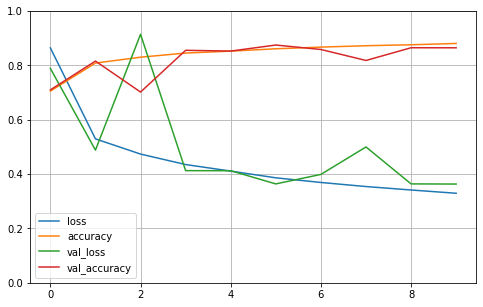

In [33]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.4004 - accuracy: 0.8513


[0.40038353204727173, 0.8513000011444092]

In [35]:
# first value is 'loss' and second is 'accuracy'.

In [36]:
X_new=X_test[:3]

In [38]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 94ms/step


In [40]:
y_pred

array([[2.41213893e-05, 2.68388503e-05, 7.62245254e-05, 3.09796851e-05,
        1.53895617e-05, 6.85425941e-03, 3.40792503e-05, 4.36829850e-02,
        3.95700382e-03, 9.45298076e-01],
       [1.28365617e-04, 3.94206552e-07, 9.89951909e-01, 2.32047514e-05,
        5.57374733e-04, 1.30406036e-07, 9.33710579e-03, 1.36411071e-09,
        1.28394868e-06, 2.24648105e-07],
       [1.45069714e-06, 9.99982715e-01, 1.00705726e-07, 9.70262772e-06,
        5.79805919e-06, 1.50124606e-08, 5.31750857e-08, 2.25950778e-08,
        3.28893819e-08, 1.29765183e-07]], dtype=float32)

In [42]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [44]:
# Comparing the above two outcomes, the predicted and test data match.

AxesImage(54,36;334.8x217.44)


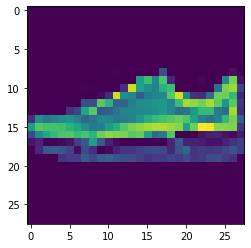

In [45]:
print(plt.imshow(X_test[9].reshape(28,28)))

AxesImage(54,36;334.8x217.44)


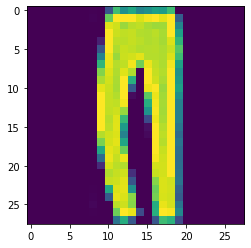

In [46]:
print(plt.imshow(X_test[2].reshape(28,28)))

AxesImage(54,36;334.8x217.44)


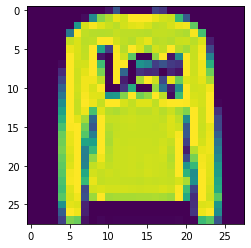

In [47]:
print(plt.imshow(X_test[1].reshape(28,28)))